# Clase 2 - Clasificación

## Algoritmos basados en instancias

K Nearest Neighbors  -  Radius Neighbors

<img src="vecinos.jpeg" width="600px" >




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
iris["data"]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
iris["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
X,y = iris["data"], iris["target"]

In [9]:
df = pd.DataFrame(X, columns= iris["feature_names"])

In [10]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
df["target"] = y

In [13]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [137]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [138]:
y_train

array([0, 2, 0, 1, 1, 0, 2, 1, 2, 2, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 2, 1, 1, 2, 1, 0, 2, 2, 2, 0,
       2, 1, 0, 0, 2, 1, 0, 2, 1, 2, 2, 1, 0, 2, 0, 0, 2, 1, 2, 2, 0, 1,
       2, 2, 0, 2, 1, 0, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 1, 2, 1, 1, 1, 0,
       0, 0])

In [139]:
y_test

array([0, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 2, 0, 2, 1, 1, 2, 2, 0, 1,
       2, 0, 0, 2, 0, 2, 2, 0, 1, 0, 2, 0, 0, 2, 0, 1])

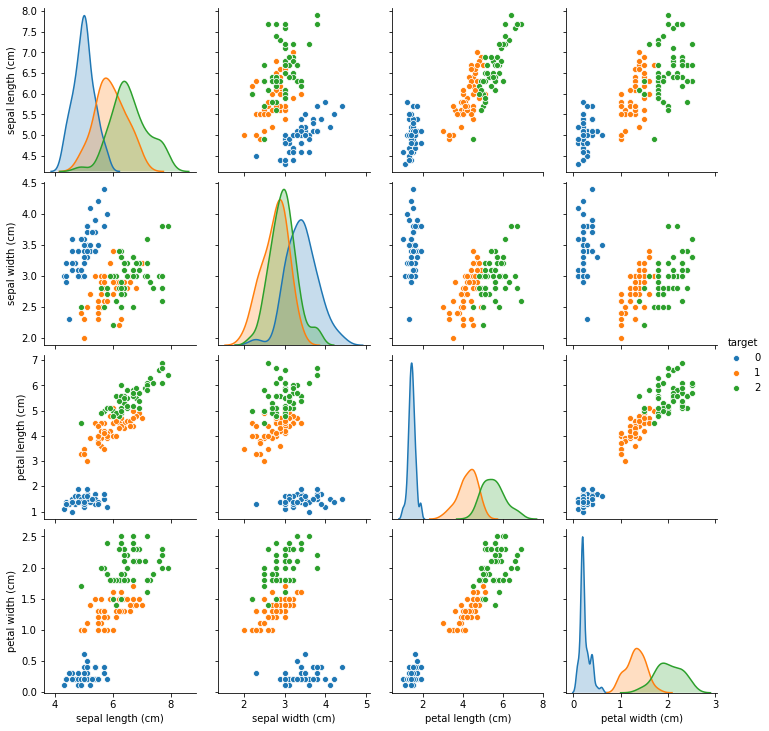

In [16]:
sns.pairplot(df, hue="target")

In [18]:
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier, VALID_METRICS


In [21]:
kn = KNeighborsClassifier()

In [22]:
VALID_METRICS

{'ball_tree': ['euclidean',
  'l2',
  'minkowski',
  'p',
  'manhattan',
  'cityblock',
  'l1',
  'chebyshev',
  'infinity',
  'seuclidean',
  'mahalanobis',
  'wminkowski',
  'hamming',
  'canberra',
  'braycurtis',
  'matching',
  'jaccard',
  'dice',
  'kulsinski',
  'rogerstanimoto',
  'russellrao',
  'sokalmichener',
  'sokalsneath',
  'haversine',
  'pyfunc'],
 'kd_tree': ['euclidean',
  'l2',
  'minkowski',
  'p',
  'manhattan',
  'cityblock',
  'l1',
  'chebyshev',
  'infinity'],
 'brute': ['cityblock',
  'cosine',
  'euclidean',
  'haversine',
  'l2',
  'l1',
  'manhattan',
  'precomputed',
  'nan_euclidean',
  'braycurtis',
  'canberra',
  'chebyshev',
  'correlation',
  'cosine',
  'dice',
  'hamming',
  'jaccard',
  'kulsinski',
  'mahalanobis',
  'matching',
  'minkowski',
  'rogerstanimoto',
  'russellrao',
  'seuclidean',
  'sokalmichener',
  'sokalsneath',
  'sqeuclidean',
  'yule',
  'wminkowski']}

In [24]:
kn.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
from sklearn.metrics import accuracy_score

In [27]:
prediccion = kn.predict(X_test)

In [28]:
prediccion

array([0, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 2, 0, 2, 1, 1, 2, 2, 0, 1,
       1, 0, 0, 2, 0, 2, 2, 0, 1, 0, 2, 0, 0, 2, 0, 1])

In [29]:
y_test

array([0, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 2, 0, 2, 1, 1, 2, 2, 0, 1,
       2, 0, 0, 2, 0, 2, 2, 0, 1, 0, 2, 0, 0, 2, 0, 1])

In [30]:
accuracy_score(y_test, prediccion)

0.9736842105263158

In [35]:
prueba_test = [0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1]

In [36]:
prueba_pred = [0] * len(prueba_test)

In [37]:
accuracy_score(prueba_test, prueba_pred)

0.6222222222222222

In [40]:
kn = KNeighborsClassifier(n_neighbors=1)
kn.fit(X_train, y_train)
pred = kn.predict(X_test)
print(accuracy_score(y_test, pred))

0.9473684210526315


In [47]:
nk = 50
scores = np.zeros((nk, 2))

for k in range(1, nk+1):
    model = KNeighborsClassifier(k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scores[k-1] = k, accuracy_score(y_test, pred)

In [48]:
scores

array([[ 1.        ,  0.94736842],
       [ 2.        ,  0.89473684],
       [ 3.        ,  0.94736842],
       [ 4.        ,  0.94736842],
       [ 5.        ,  0.97368421],
       [ 6.        ,  0.92105263],
       [ 7.        ,  0.97368421],
       [ 8.        ,  0.94736842],
       [ 9.        ,  0.97368421],
       [10.        ,  0.94736842],
       [11.        ,  0.97368421],
       [12.        ,  0.97368421],
       [13.        ,  0.97368421],
       [14.        ,  0.97368421],
       [15.        ,  0.97368421],
       [16.        ,  0.97368421],
       [17.        ,  0.97368421],
       [18.        ,  0.97368421],
       [19.        ,  0.97368421],
       [20.        ,  0.97368421],
       [21.        ,  0.97368421],
       [22.        ,  0.94736842],
       [23.        ,  0.94736842],
       [24.        ,  0.92105263],
       [25.        ,  0.92105263],
       [26.        ,  0.92105263],
       [27.        ,  0.92105263],
       [28.        ,  0.92105263],
       [29.        ,

(0.0, 1.0)

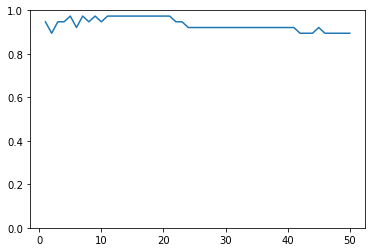

In [50]:
plt.plot(scores[:,0], scores[:,1])
plt.ylim(0,1)

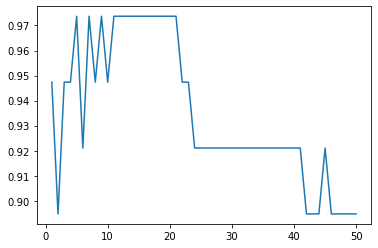

In [51]:
plt.plot(scores[:,0], scores[:,1])


In [54]:
final_model = KNeighborsClassifier(n_neighbors=15)
final_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [55]:
rn = RadiusNeighborsClassifier()

In [56]:
rn.fit(X_train, y_train)

RadiusNeighborsClassifier()

In [57]:
pred = rn.predict(X_test)

In [58]:
accuracy_score(y_test, pred)

0.9473684210526315

In [72]:
n = 20
scores = np.zeros((n,2))

for i, r in enumerate(np.linspace(0.65, 1.5, n)):
    model = RadiusNeighborsClassifier(radius = r)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scores[i] = r, accuracy_score(y_test, pred)

In [73]:
lista = ["a", "b", "c"]

In [74]:
for i, letra in enumerate(lista):
    print(i, letra)

0 a
1 b
2 c


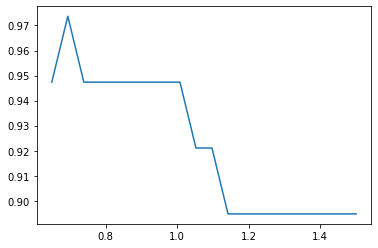

In [75]:
plt.plot(scores[:,0],scores[:,1])

In [76]:
scores

array([[0.65      , 0.94736842],
       [0.69473684, 0.97368421],
       [0.73947368, 0.94736842],
       [0.78421053, 0.94736842],
       [0.82894737, 0.94736842],
       [0.87368421, 0.94736842],
       [0.91842105, 0.94736842],
       [0.96315789, 0.94736842],
       [1.00789474, 0.94736842],
       [1.05263158, 0.92105263],
       [1.09736842, 0.92105263],
       [1.14210526, 0.89473684],
       [1.18684211, 0.89473684],
       [1.23157895, 0.89473684],
       [1.27631579, 0.89473684],
       [1.32105263, 0.89473684],
       [1.36578947, 0.89473684],
       [1.41052632, 0.89473684],
       [1.45526316, 0.89473684],
       [1.5       , 0.89473684]])

In [81]:
scores[scores[:,1].argmax(),0]

0.6947368421052632

In [90]:
rn.predict([[5654654,654654,654654,654654]])

ValueError: No neighbors found for test samples array([0]), you can try using larger radius, giving a label for outliers, or considering removing them from your dataset.

In [91]:
kn.predict([[5654654,654654,654654,654654]])

array([2])

## Modelos generativos

### Gaussian Naive Bayes

Es un modelo probabilístico que asume condiciones muy sencillas (de ahí el *naive - ingenuo*) como la independencia de las variables y que todas tienen una distribución gaussiana

<img src="campana.png" width="500px" >

El modelo genera una distribución de probabilidad para cada categoría


<img src="generativo.png" width="500px" >

In [82]:
from sklearn.naive_bayes import GaussianNB, 

In [84]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)
accuracy_score(y_test, pred)

0.9473684210526315

In [87]:
gnb.sigma_

array([[0.08569759, 0.1014171 , 0.03157049, 0.01006574],
       [0.28368421, 0.11252078, 0.1922507 , 0.04301939],
       [0.39815924, 0.09088386, 0.28943755, 0.07114683]])

In [88]:
gnb.theta_

array([[4.94324324, 3.34864865, 1.47567568, 0.24864865],
       [6.        , 2.78947368, 4.33421053, 1.35263158],
       [6.55405405, 2.97837838, 5.55945946, 2.04864865]])

In [89]:
gnb.predict([[5000,10000,15651651,84984684]])

array([2])

### Árbol de decisión

Va separando los datos en nuevos nodos de modo que luego de cada regla de separación aumenta el nivel de "pureza" de cada nodo. 


<img src="Decision_Tree1.png" width="600px" >

El algoritmo continúa hasta que todos los datos quedan separados

<img src="seleccion.png" width="600px" >

In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
dtc = DecisionTreeClassifier()

In [94]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [96]:
pred = dtc.predict(X_test)

In [97]:
accuracy_score(y_test, pred)

0.9210526315789473

In [99]:
dtc.feature_importances_

array([0.01339392, 0.        , 0.07427586, 0.91233022])

In [100]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [101]:
from sklearn.tree import plot_tree

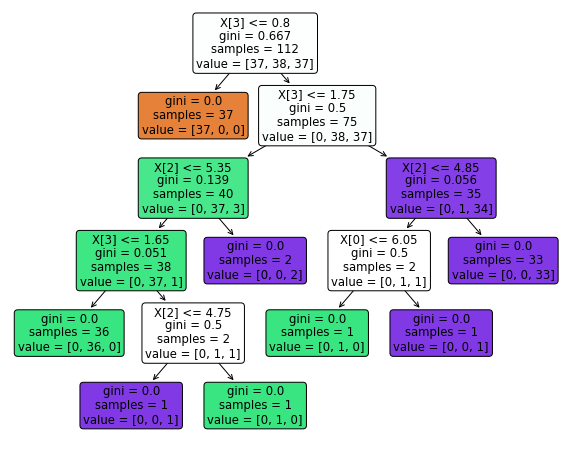

In [108]:
plt.figure(figsize=(10,8))
plot_tree(dtc, filled=True, rounded = True)
plt.show()

In [109]:
dtc2 = DecisionTreeClassifier(max_depth=3)
dtc2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(209.25, 380.52, 'X[2] <= 2.6\ngini = 0.667\nsamples = 112\nvalue = [37, 38, 37]'),
 Text(139.5, 271.8, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(279.0, 271.8, 'X[3] <= 1.75\ngini = 0.5\nsamples = 75\nvalue = [0, 38, 37]'),
 Text(139.5, 163.07999999999998, 'X[2] <= 5.35\ngini = 0.139\nsamples = 40\nvalue = [0, 37, 3]'),
 Text(69.75, 54.360000000000014, 'gini = 0.051\nsamples = 38\nvalue = [0, 37, 1]'),
 Text(209.25, 54.360000000000014, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(418.5, 163.07999999999998, 'X[2] <= 4.85\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(348.75, 54.360000000000014, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(488.25, 54.360000000000014, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

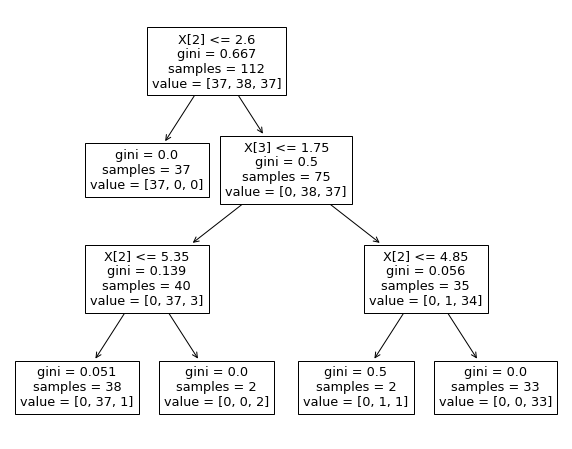

In [111]:
plt.figure(figsize=(10,8))
plot_tree(dtc2)

### Overfitting

Al continuar hasta la separacion total se puede caer en overfitting

<img src="overfiting.png" width="800px" >

Una forma de evitar el overfitting en árboles de decisión es "podar" el arbol, es decir, limitar la profundidad del arbol  o la pureza final de cada nodo.

In [116]:
depth = [1,2,3,4,5,6,7,8,9,10,11,12]
scores = []
for d in depth:
    model = DecisionTreeClassifier(max_depth=d)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, pred))

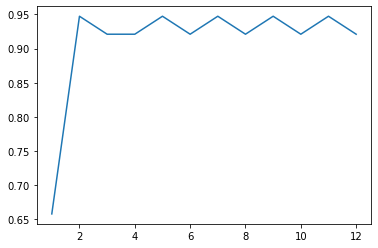

In [117]:
plt.plot(depth, scores)

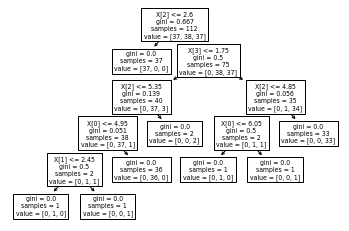

In [119]:
plot_tree(model)
plt.show()

### Random Forest

Esta técnica crea muchos árboles distintos tomando una porción de los datos al azar para cada uno. Luego toma el voto por la mayorís de los clasificadores para predecir la clase

<img src="randomforest.png" width="600px" >

In [120]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
forest = RandomForestClassifier()

In [122]:
forest.fit(X_train, y_train)

RandomForestClassifier()

In [123]:
accuracy_score(y_test, forest.predict(X_test))

0.9473684210526315

In [129]:
models = [KNeighborsClassifier, GaussianNB, RandomForestClassifier]
nombres = ["K neighbors", "Gaussian NB", "Random Forest"]

In [130]:
scores = []
for model in models:
    modelo = model()
    modelo.fit(X_train, y_train)
    pred = modelo.predict(X_test)
    scores.append(accuracy_score(y_test, pred))

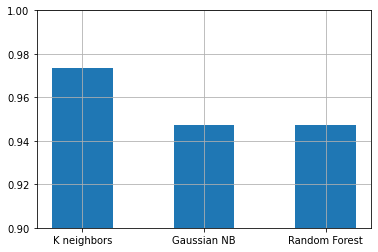

In [136]:
plt.bar(nombres,scores, width=0.5)
plt.ylim(0.9,1)
plt.grid()

In [133]:
scores

[0.9736842105263158, 0.9473684210526315, 0.9473684210526315]

## Métricas

<img src="confusionmatrix.jpeg" width="400px" >


$$accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

$$precision=\frac{TP}{TP+FP}$$


$$recall=\frac{TP}{TP+FN}$$

Se puede tener en cuenta ambas métricas haciendo un promedio, pero esto no sirve cuando la cantidad de las categorías están muy desequilibradas. Para eso se usa la media harmónica o *F1 score*


$$F1=\frac{2}{\frac{1}{precision}+\frac{1}{recall}} = \frac{2 \cdot precision\cdot recall}{precision+ recall} = \frac{TP}{TP + \frac{FN+FP}{2}}  $$

## Validación cruzada

Nunca hay que ajustar nada de los modelos usando el test set, que debe ser invisible a nuestro análisis hasta el final. Para eso se usa *cross-validation*, que separa el test set en n partes iguales y utiliza n-1 partes como train set y la restante como test set, rotando todas las posibilidades